In [1]:
import math
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

C:\Users\khngu\AppData\Local\Temp\ipykernel_74492\816651681.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


C:\Users\khngu\AppData\Local\Temp\ipykernel_57084\1541043539.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


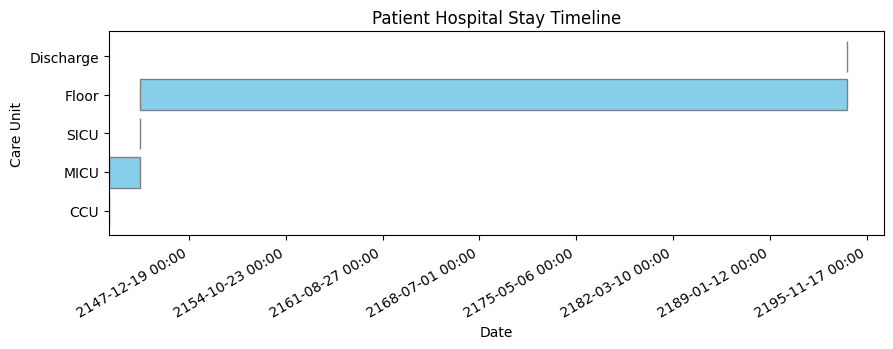

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Sample data for a single patient's transfers (the structure is based on your example)
df_patient_transfers = pd.DataFrame({
    'PREV_CAREUNIT': ['ER', 'CCU', 'MICU', 'SICU', 'Floor', 'Discharge'],
    'CURR_CAREUNIT': ['CCU', 'MICU', 'SICU', 'Floor', 'Discharge', ''],
    'INTIME': pd.to_datetime(['2142-04-29 15:27:11', '2142-05-04 20:38:33', '2144-07-01 04:13:59', 
                              '2144-07-01 17:56:31', '2194-06-13 18:41:27', '2194-06-18 16:57:29']),
    'OUTTIME': pd.to_datetime(['2142-05-04 20:38:33', '2144-07-01 04:13:59', '2144-07-01 17:56:31', 
                               '2194-06-13 18:41:27', '2194-06-18 16:57:29', ''])
})

# Drop the discharge row (last transfer) as it does not have a corresponding out time
df_patient_transfers = df_patient_transfers[:-1]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 3))

# Adding bars for each care unit stay
for index, row in df_patient_transfers.iterrows():
    start_date = mdates.date2num(row['INTIME'])
    end_date = mdates.date2num(row['OUTTIME'])
    ax.barh(row['CURR_CAREUNIT'], end_date - start_date, left=start_date, color='skyblue', edgecolor='grey')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Care Unit')
plt.title('Patient Hospital Stay Timeline')

# Rotate and align the tick labels so they look better
fig.autofmt_xdate()

# Define the date format
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(date_format)

# Show the plot
plt.show()


In [4]:
# Load the data
admissions_df = pd.read_csv('../MIMIC-III-Visuals/data/mimic-iii-clinical-database-1.4/ADMISSIONS.csv.gz')
icustays_df = pd.read_csv('../MIMIC-III-Visuals/data/mimic-iii-clinical-database-1.4/ICUSTAYS.csv.gz')
labevents_df = pd.read_csv('../MIMIC-III-Visuals/data/mimic-iii-clinical-database-1.4/LABEVENTS.csv.gz')

# Convert datetime columns to datetime objects
admissions_df['ADMITTIME'] = pd.to_datetime(admissions_df['ADMITTIME'])
admissions_df['DISCHTIME'] = pd.to_datetime(admissions_df['DISCHTIME'])
icustays_df['INTIME'] = pd.to_datetime(icustays_df['INTIME'])
icustays_df['OUTTIME'] = pd.to_datetime(icustays_df['OUTTIME'])
labevents_df['CHARTTIME'] = pd.to_datetime(labevents_df['CHARTTIME'])

# Filter ICU stays to exclude rows with NaT in 'INTIME' or 'OUTTIME'
icustays_df = icustays_df.dropna(subset=['INTIME', 'OUTTIME'])

# Assuming labevents_df uses 'CHARTTIME', filter to exclude NaT or NaN
labevents_df = labevents_df.dropna(subset=['CHARTTIME'])

In [8]:
# Filter by HADM_ID if your df_events contains multiple admissions
hadm_id_specific = 123456
df_merge = pd.merge(admissions_df, icustays_df, how='inner', on='HADM_ID')
df_merge = pd.merge(df_merge, labevents_df, how='inner', on='HADM_ID')

In [13]:
df_merge[df_merge['HADM_ID'] == 123456]

,ROW_ID_x,SUBJECT_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,OUTTIME,LOS,ROW_ID,SUBJECT_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
13458573,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104635,24489,50893,2174-01-23 09:27:00,8.0,8.0,mg/dL,abnormal
13458574,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104636,24489,50902,2174-01-23 09:27:00,101,101.0,mEq/L,NaN
13458575,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104637,24489,50912,2174-01-23 09:27:00,4.9,4.9,mg/dL,abnormal
13458576,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104638,24489,50931,2174-01-23 09:27:00,102,102.0,mg/dL,NaN
13458577,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104639,24489,50960,2174-01-23 09:27:00,1.7,1.7,mg/dL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458940,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104630,24489,50960,2174-01-22 15:30:00,1.9,1.9,mg/dL,NaN
13458941,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104631,24489,50971,2174-01-22 15:30:00,4.4,4.4,mEq/L,NaN
13458942,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104632,24489,51221,2174-01-22 15:30:00,31.5,31.5,%,abnormal
13458943,29900,24489,123456,2174-01-20 17:09:00,2174-02-03 12:16:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2174-01-24 01:15:22,3.2207,15104633,24489,50868,2174-01-23 09:27:00,13,13.0,mEq/L,NaN
